# Titanic Classification

### The following notebook explains in brief how to train a simple machine learning model to tackle the Titanic classification challenge on Kaggle. 

#### This is my first Kaggle challenge attempt and the work here is much inspired from already existing kernels on Kaggle.

### Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn as sns
%matplotlib inline

### Importing the dataset:

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train,test],axis=0,sort=False)
data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 Let us know the likelihood of survival of passengers based on some of their data. The float values represent the likelihood of their survival.

In [4]:
train[['Pclass','Survived']].groupby(train['Pclass']).mean()

Pclass  Survived
Pclass                  
1          1.0  0.629630
2          2.0  0.472826
3          3.0  0.242363

Above, we get Class wise likelihood of Survival. As we can see, the passengers with class 1 tickets are more likely to survive than the remaining two.

In [5]:
train[['Sex','Survived']].groupby(train['Sex']).mean()

Survived
Sex             
female  0.742038
male    0.188908

Similarly, we see gender wise likelihood of Survival.

There are two columns named number of siblings/spouses and parents/children. We can use that data and create a new column named Family size and then group them to check the likelihood of survival based on their family sizes:

In [6]:
for row in train:
    train['Family size'] = train['SibSp'] + train['Parch'] + 1

for row in test:
    test['Family size'] = test['SibSp'] + test['Parch'] + 1
train[['Family size','Survived']].groupby(train['Family size']).mean()

Family size  Survived
Family size                       
1                    1.0  0.303538
2                    2.0  0.552795
3                    3.0  0.578431
4                    4.0  0.724138
5                    5.0  0.200000
6                    6.0  0.136364
7                    7.0  0.333333
8                    8.0  0.000000
11                  11.0  0.000000

Let us check how being a lone passenger contributes to survival. Below we can see that lone passengers are less likely to survive.

In [7]:
for row in train:
        train['isAlone'] = 0
        train.loc[train['Family size']==1, 'isAlone'] = 1

for row in test:
        test['isAlone'] = 0
        test.loc[test['Family size']==1, 'isAlone'] = 1
        
train[['isAlone','Survived']].groupby(train['isAlone']).mean()

isAlone  Survived
isAlone                   
0            0.0  0.505650
1            1.0  0.303538

The Embarked column records data of port of Embarkation of the passengers. Since there are some missing values in the Embarked column, we fill those missing values by mode ie. most occuring value ie. 'S'.

In [8]:
data['Embarked'].groupby(data['Embarked']).count()

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [9]:
train['Embarked'] = train['Embarked'].fillna('S')
train[['Embarked','Survived']].groupby(train['Embarked']).mean()

test['Embarked'] = test['Embarked'].fillna('S')
train[['Embarked','Survived']].groupby(train['Embarked']).mean()

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009

Let us impute the missing values of Fare details by the median of the records and then categorize the fare details into 10 ranges. 

In [10]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'],4)

test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['CategoricalFare'] = pd.qcut(test['Fare'],4)
train[['CategoricalFare','Survived']].groupby(train['CategoricalFare']).mean()

Survived
CategoricalFare          
(-0.001, 7.91]   0.197309
(7.91, 14.454]   0.303571
(14.454, 31.0]   0.454955
(31.0, 512.329]  0.581081

Now let us deal with the Age values:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


As one can notice, out of total 891, only 714 values of age are recorded while the remaining data is missing. Since the 177 records whose ages are missing still might represent crucial data about other attributes, we simply cannot discard those records. A better method to deal with them is by replacing them by random numbers among the upper and lower range of standard deviation from the mean values of age. Let us do that:

In [12]:
for row in train:
    avg = train['Age'].mean()
    std = train['Age'].std()
    null_count = train['Age'].isnull().sum()
    age_null_random_list = np.random.randint(avg - std, avg + std, size=null_count)
    train['Age'][np.isnan(train['Age'])] = age_null_random_list
    train['Age'] = train['Age'].astype(int)

for row in test:
    avg = test['Age'].mean()
    std = test['Age'].std()
    null_count = test['Age'].isnull().sum()
    age_null_random_list = np.random.randint(avg - std, avg + std, size=null_count)
    test['Age'][np.isnan(test['Age'])] = age_null_random_list
    test['Age'] = test['Age'].astype(int)


C:\Users\sunflower\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sunflower\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
train['CategoricalAge'] = pd.cut(train['Age'],5)

test['CategoricalAge'] = pd.cut(test['Age'],5)
train[['CategoricalAge','Survived']].groupby(train['CategoricalAge']).mean()

Survived
CategoricalAge          
(-0.08, 16.0]   0.500000
(16.0, 32.0]    0.351111
(32.0, 48.0]    0.386831
(48.0, 64.0]    0.434783
(64.0, 80.0]    0.090909

Now that we have imputed some missing values, let us handle the categorical values and handle the ranged values

In [14]:
 # Mapping Fare
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3

train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4


test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3

test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4


In [15]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    1.332211    0.523008   
std     257.353842    0.486592    0.836071    0.846450    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    1.000000    0.000000   
50%     446.000000    0.000000    3.000000    1.000000    0.000000   
75%     668.500000    1.000000    3.000000    2.000000    1.000000   
max     891.000000    1.000000    3.000000    4.000000    8.000000   

            Parch        Fare  Family size     isAlone  
count  891.000000  891.000000   891.000000  891.000000  
mean     0.381594    1.505051     1.904602    0.602694  
std      0.806057    1.118148     1.613459    0.489615  
min      0.000000    0.000000     1.000000    0.000000  
25%      0.000000    0.500000     1.000000    0.000000  
50%      0.000000    2.000000     1.000000    1.000000  
75%      0.000000    2.000000     2.000000    1.000000  
max      6.000000    3.000000    11.000000    1.000000

In [16]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550    1.373206    0.447368    0.392344   
std     120.810458    0.841838    0.783186    0.896760    0.981429   
min     892.000000    1.000000    0.000000    0.000000    0.000000   
25%     996.250000    1.000000    1.000000    0.000000    0.000000   
50%    1100.500000    3.000000    1.000000    0.000000    0.000000   
75%    1204.750000    3.000000    2.000000    1.000000    0.000000   
max    1309.000000    3.000000    4.000000    8.000000    9.000000   

             Fare  Family size     isAlone  
count  418.000000   418.000000  418.000000  
mean     1.490431     1.839713    0.605263  
std      1.146846     1.519072    0.489380  
min      0.000000     1.000000    0.000000  
25%      0.000000     1.000000    0.000000  
50%      2.000000     1.000000    1.000000  
75%      3.000000     2.000000    1.000000  
max      3.000000    11.000000    1.000000

In [17]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch            Ticket  Fare Cabin Embarked  Family size  isAlone  \
0      0         A/5 21171   0.0   NaN        S            2        0   
1      0          PC 17599   3.0   C85        C            2        0   
2      0  STON/O2. 3101282   1.0   NaN        S            1        1   
3      0            113803   3.0  C123        S            2        0   
4      0            373450   1.0   NaN        S            1        1   

   CategoricalFare CategoricalAge  
0   (-0.001, 7.91]   (16.0, 32.0]  
1  (31.0, 512.329]   (32.0, 48.0]  
2   (7.91, 14.454]   (16.0, 32.0]  
3  (31.0, 512.329]   (32.0, 48.0]  
4   (7.91, 14.454]   (32.0, 48.0]

In [18]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})
test['Sex'] = test['Sex'].map({'female':0,'male':1})
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2})

Now that all our feature engineering and data cleaning is done, let us select the attributes from the dataset and perform visualization.

But before that, let us get rid of unnecessary columns. We can get rid of columns such as Passenger Names, the Ticket nos., Cabin records, SibSp & Parch(Since we already used them in Family size), CategoricalFare and CategoricalAge.

In [19]:
train = train.drop(['Name','SibSp','Parch','Ticket','Cabin','CategoricalFare','CategoricalAge'],axis = 1)
test = test.drop(['Name','SibSp','Parch','Ticket','Cabin','CategoricalFare','CategoricalAge'], axis = 1)

C:\Users\sunflower\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\sunflower\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


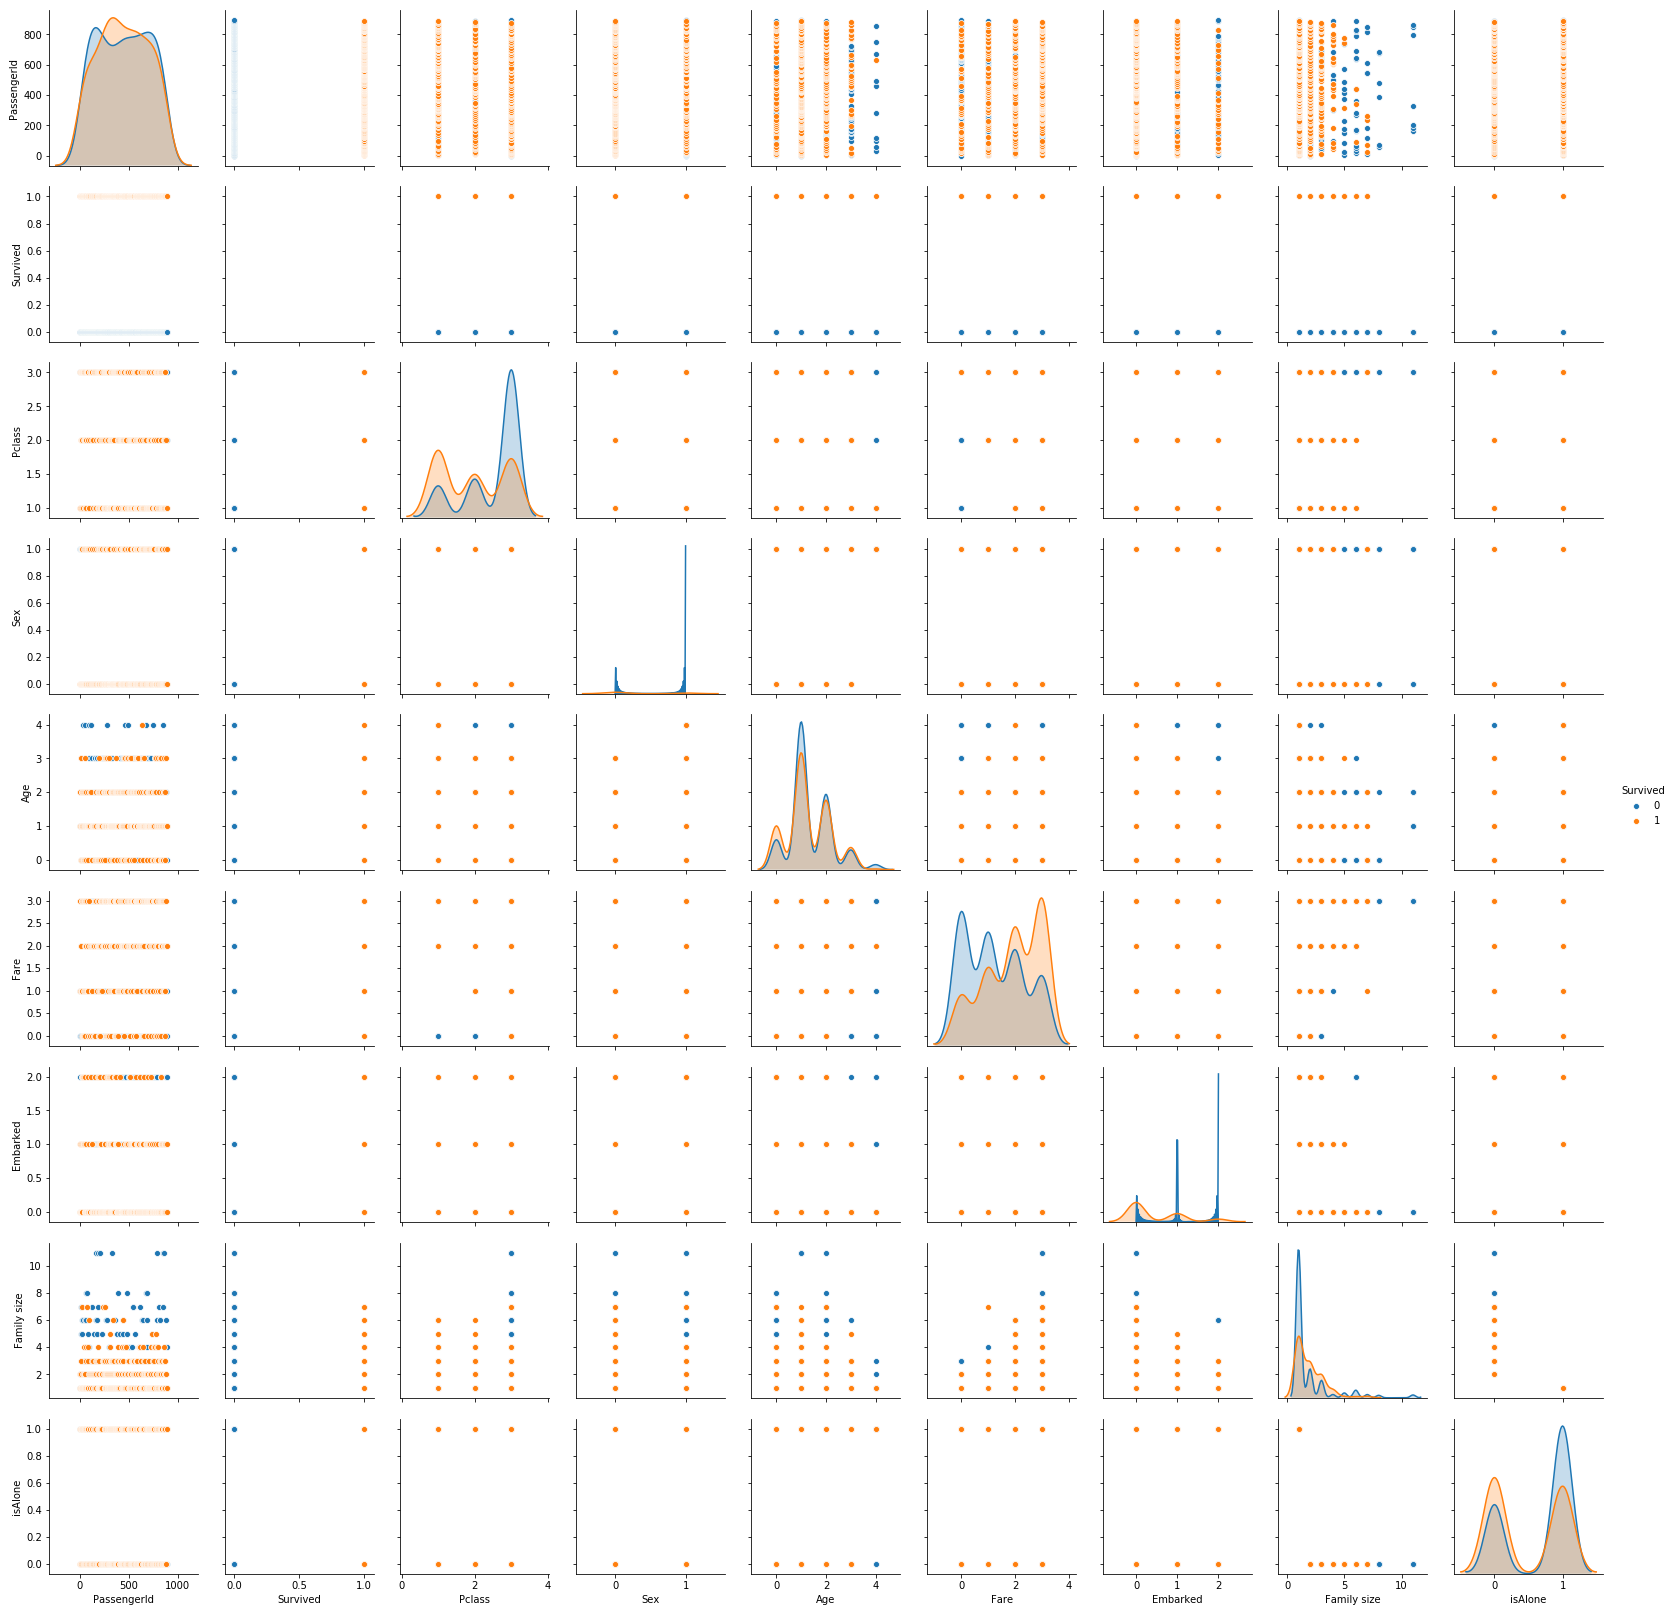

In [20]:
sns.pairplot(train,hue='Survived')

Sex wise distribution of survival.

Female --> 0
Male --> 1

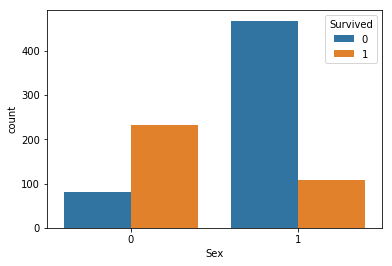

In [21]:
sns.countplot(x=train['Sex'],data=train,hue="Survived",orient='v')

Sex wise distribution of Age.

Female --> 0
Male --> 1

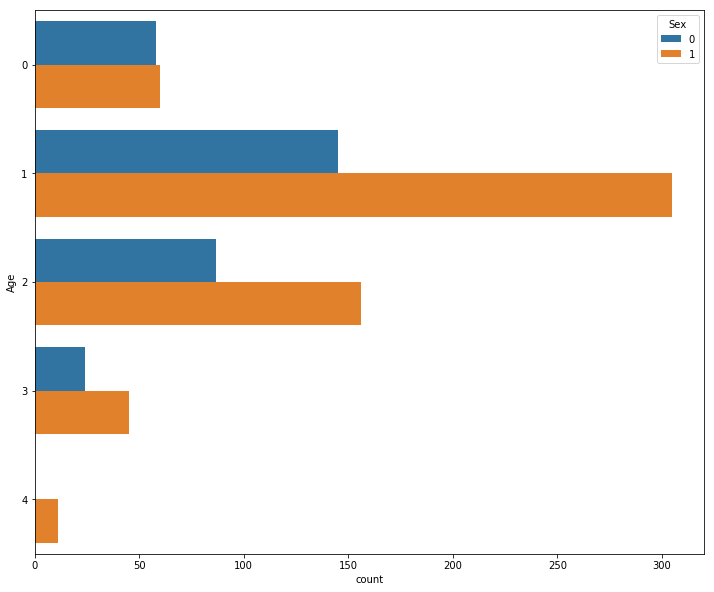

In [22]:
plt.figure(figsize=(12,10))
sns.countplot(y=train['Age'],data=train,hue='Sex')

The records representing Embarkation and the Class of the passengers

<Figure size 1080x1080 with 0 Axes>

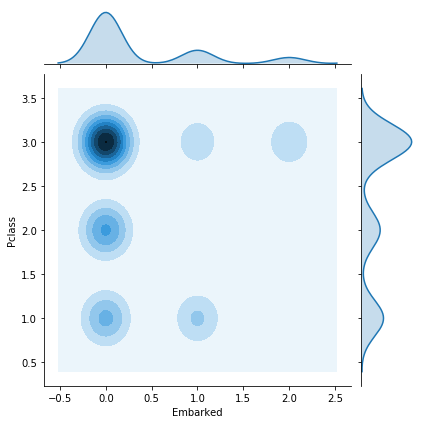

In [23]:
plt.figure(figsize=(15,15))
sns.jointplot(train['Embarked'],train['Pclass'],kind="kde")

Class wise Fare distribution which tells the relativity among the two attributes:

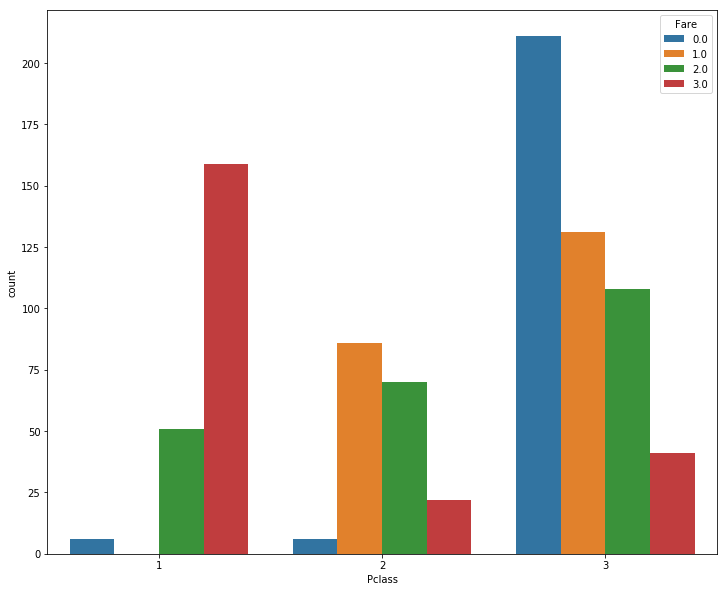

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(x=train['Pclass'],data=train,hue="Fare") 

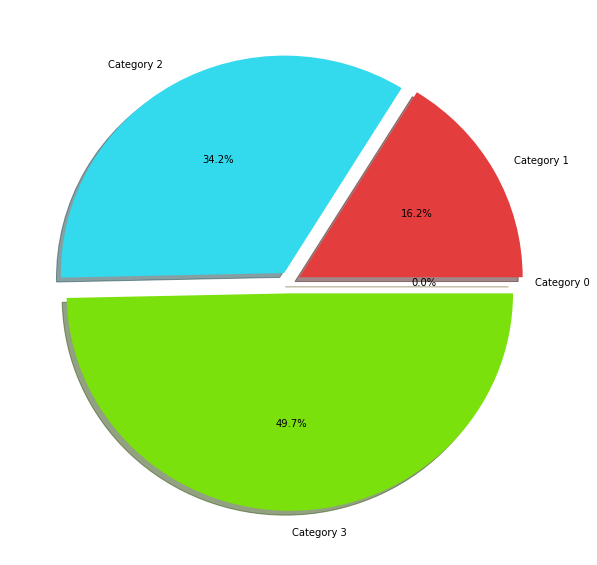

In [25]:
explode =(0,0.05,0.05,0.05)
plt.figure(figsize=(10,10))
plt.pie(train['Fare'].groupby(train['Fare']).sum(),labels=['Category 0','Category 1','Category 2','Category 3'],
        colors=['gold','#e33d3d','#33d9ed','#7ae10c'],
        explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

### Classification Modelling

We will be creating our classification model on several different classification algorithms including some Ensembling models such as Random Forests, Adaboost, Gradient boosting etc.

Refer to the links below to know more about the different classification models:
<pre>
<a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">K nearest Neighbors</a>
<a href="https://en.wikipedia.org/wiki/Support_vector_machine">Support Vector Machines</a>
<a href="https://en.wikipedia.org/wiki/Decision_tree">Decision Trees</a>
<a href="https://en.wikipedia.org/wiki/Random_forest">Random Forests</a>
<a href="https://en.wikipedia.org/wiki/AdaBoost">Adaboost</a>
<a href="https://en.wikipedia.org/wiki/Gradient_boosting">Gradient boosting</a>
<a href="https://en.wikipedia.org/wiki/Naive_Bayes_classifier">Naive Bayes Classification</a>
<a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic Regression</a>
</pre>

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

x = train.iloc[:,[0,2,3,4,5,6,7,8]].values
y = train.iloc[:,1].values

classifiers = [
    KNeighborsClassifier(4),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

chart = pd.DataFrame(columns=["Classifier", "Accuracy"])

acc_dict = {}

for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=["Classifier", "Accuracy"])
    chart = chart.append(log_entry)

What we have done here is fit the training data to all the models and mapped their accuracies into a bar chart. The plot quite delineates which model is able to classify the Survival of the passengers better.

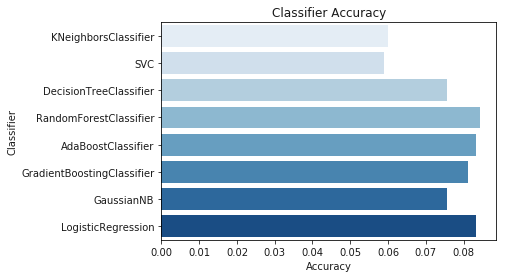

In [27]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=chart, palette="Blues")

In [28]:
chart['Accuracy']= chart['Accuracy']*1000
chart

Classifier   Accuracy
0        KNeighborsClassifier  60.000000
0                         SVC  58.888889
0      DecisionTreeClassifier  75.555556
0      RandomForestClassifier  84.444444
0          AdaBoostClassifier  83.333333
0  GradientBoostingClassifier  81.111111
0                  GaussianNB  75.555556
0          LogisticRegression  83.333333

As one can notice, the Random Forest classifier shows the maximum accuracy in classifying the survival of passengers, hence we will use it to predict our values.

In [29]:
final_classifier = RandomForestClassifier()
final_classifier.fit(train.iloc[:,[0,2,3,4,5,6,7,8]].values,train.iloc[:,1].values)
result = final_classifier.predict(test)

In [35]:
result = DataFrame(result)
result

0
0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
10   0
11   1
12   1
13   0
14   1
15   1
16   0
17   0
18   1
19   1
20   0
21   1
22   1
23   0
24   1
25   0
26   1
27   0
28   1
29   0
..  ..
388  0
389  0
390  0
391  1
392  0
393  0
394  0
395  1
396  0
397  1
398  0
399  0
400  1
401  0
402  1
403  0
404  0
405  0
406  0
407  0
408  0
409  0
410  0
411  1
412  0
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]

Therefore, we conclude the titanic classification modelling using Python. The better classifier was Random forests, whereas the algorithm to perform poorly on the data was Support Vector Classifier.  

## Thanks for Reading.